# RANDOM FOREST ALGORITHEM

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('INTRUSION.csv')
df.head(60)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos
6,0,icmp,50,4,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
7,0,icmp,50,4,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos
8,0,icmp,52,4,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
9,0,icmp,50,4,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos


In [3]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [4]:
df=df.dropna()

In [5]:
df.shape

(125973, 42)

In [6]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'xAttack'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['protocol_type','xAttack']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [8]:
df.head(60)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
5,0,0,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,0
6,0,0,50,4,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
7,0,0,50,4,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,0
8,0,0,52,4,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
9,0,0,50,4,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0


In [8]:
x1 = df.drop(labels='xAttack', axis=1)
y1 = df.loc[:,'xAttack']

In [11]:
#import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
OVER SAMPLING DATA COUNT  :  Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  269372
NUMBER OF TEST DATASET      :  67343
TOTAL NUMBER OF DATASET    :  336715


In [13]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  269372
NUMBER OF TEST DATASET      :  67343
TOTAL NUMBER OF DATASET    :  336715


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
predicted = rf.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF RandomForestClassifier:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF RandomForestClassifier:


 [[13469     0     0     0     0]
 [    1 13462     2     1     2]
 [    0     0 13469     0     0]
 [    0     0     0 13469     0]
 [    0     0     0     0 13468]]


In [18]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF RandomForestClassifier IS :",a*100)

THE ACCURACY SCORE OF RandomForestClassifier IS : 99.9910903880136


In [19]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF RandomForestClassifier IS :",hl*100)

THE HAMMING LOSS OF RandomForestClassifier IS : 0.008909611986397992


In [20]:
from sklearn.metrics import classification_report
P = classification_report(y_test,predicted)
print("THE CLASSIFICATION REPORT OF RandomForestClassifier IS :\n\n",P)

THE CLASSIFICATION REPORT OF RandomForestClassifier IS :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13469
           1       1.00      1.00      1.00     13468
           2       1.00      1.00      1.00     13469
           3       1.00      1.00      1.00     13469
           4       1.00      1.00      1.00     13468

    accuracy                           1.00     67343
   macro avg       1.00      1.00      1.00     67343
weighted avg       1.00      1.00      1.00     67343



THE CONFUSION MATRIX SCORE OF RandomForestClassifier:


[[13469     0     0     0     0]
 [    1 13462     2     1     2]
 [    0     0 13469     0     0]
 [    0     0     0 13469     0]
 [    0     0     0     0 13468]]


DISPLAY CONFUSION MATRIX : 




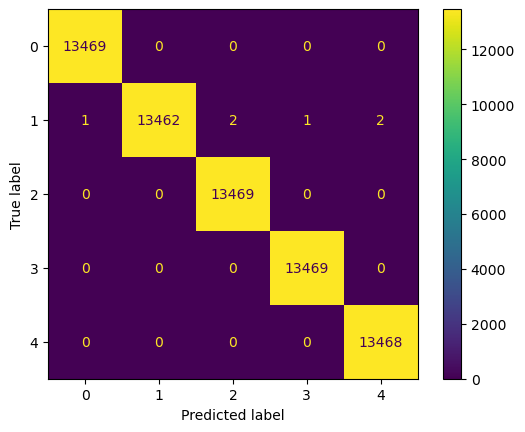

In [21]:
cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RandomForestClassifier:\n\n')
print(cm)
print("\n\nDISPLAY CONFUSION MATRIX : \n\n")
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()
plt.show()


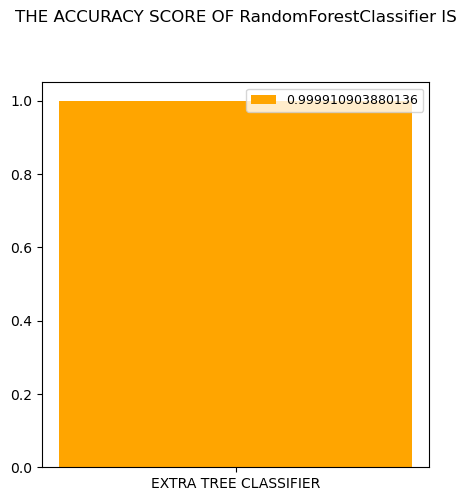

In [22]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="EXTRA TREE CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("ORANGE"))
    plt.title("THE ACCURACY SCORE OF RandomForestClassifier IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [23]:
import joblib
joblib.dump(RFC, 'INTRUSION.pkl')

NameError: name 'RFC' is not defined